## SPRINT 8.1 - Visualizaciones en Python

Mailin Adriana Villan Villan <br>

Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

***


## Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

***


** Preparacion del entorno

Lo primero que hice para realizar este spring fue actualizar pip e instalar varios paquetes en Python:

Con el primer import sys se proporcionan funciones y variables del sistema, se ejecuta el mismo intérprete de Python que está en uso<br> y se actualiza el gestor de paquetes de Python.

Con el segundo import sys, se instalan varios paquetes en Python para análisis de datos, visualización y conexión con MySQL.<br> He usado sys.executable para asegurar que los paquetes se instalen en la versión correcta de Python. 

In [70]:
import sys
!{sys.executable} -m pip install --upgrade pip

import sys
!{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy squarify


Posteriormente importe las librerías necesarias para el manejo de los datos y la creación de gráficas que me permitan realizar los ejercicios.<br> 
Las librerías que utilizaré son:

Pandas: para la manipulación y análisis de datos.
Matplotlib: para la creación de gráficas.
Seaborn: para generar visualizaciones más estilizadas y facilitar el análisis estadístico.
Numpy: para realizar calculos matematicos y analizar los datos.
squarify: para crear treemaps y visualizar la distribución de datos de manera compacta y comparativa.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

** Configuración de la conexión en Python con MySQL Workbench. 

1. Importé la librería mysql-connector para permitir la conexión.

2. Defini el método de conexión a MySQL. Para esto, utilicé mysql.connector para establecer una conexión con la BD y, si la conexión es exitosa, se realizan los siguientes pasos:
   ** Se muestra la version del servidor MySQL y el nombre de la BD, que en este caso es "transactions".
   ** Se Obtene una lista de las tablas<br>
   ** Se Itera sobre las tablas para poder crear los DataFrame de pandas con los datos obtenidos.

3. En el caso de que haya un error en la conexión, se muestra un mensaje indicando el problema. 

4. Finalmente, si la conexión sigue activa, se cierran tanto el cursor como la conexión para liberar los recursos.

In [72]:
import mysql.connector 
from mysql.connector import Error

try:
    conexion_bd = mysql.connector.connect(host='localhost',
                                         database='transactions',
                                         user='root',
                                         password='root')
    pd.set_option("display.max.columns", None) 
    
    if conexion_bd.is_connected():
        db_Info = conexion_bd.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = conexion_bd.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        cursor = conexion_bd.cursor()
        cursor.execute("SHOW TABLES")
        MySQL_tables = [table[0] for table in cursor.fetchall()]  

        for table in MySQL_tables:  
            cursor.execute(f"SELECT * FROM {table}") # Ejecuta la consulta "Select * From {tabla}" para extraer los datos de c/tabla
            columnas = [columna[0] for columna in cursor.description] # Obtención de lista de nombres de las columnas de la tabla 
            globals()[f'df_{table}'] = pd.DataFrame(cursor.fetchall(), columns=columnas) #Creación y nombramiento dinamico de pd.df
            print(f'df_{table}')
        
        # cierro la BD
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")                    
           
except Error as e:
    print("Error while connecting to MySQL", e)
 

Connected to MySQL Server version  8.4.0
You're connected to database:  ('transactions',)
df_companies
df_credit_cards
df_estat_targetes
df_products
df_transactions
df_transactions_products
df_transation_num_product
df_users
MySQL connection is closed


** Revision de los datos de los dataframes y merges

1. Verifiqué los tipos de datos de las columnas utilizando el método df_name.info(). 

2. Converti los tipos de datos utilizando el método .astype() para las columnas adecuadas 
   * En el df_transactions cambie el tipo de dato a la columna amount, declined 
   * En el df_products cambie el tipo de dato a la columna price a float. para esto previamente tuve que eliminar el simbolo $ y elimar espacios en blanco 
     que puedan estar al inicio

3. A continuación explico los merges creados y comento en cuales ejercicio los he usado:

Nivel 1, ejercicios 5 y 6 y Nivel 3 ejercicio 2
  * Uni los DataFrame df_transactions y df_companies utilizando la clave business_id en df_transactions y company_id en df_companies.
  * Convierti la columna timestamp a formato de fecha (datetime) para extraer el año de cada transacción.
  * Cree una nueva columna year que extrae el año de la transacción.

Nivel 1 ejercicio 7
Uni los DataFrame df_products (productos) y df_transactions_products (transacciones de productos) usando pd.merge():
  * left_on='id', el ID del producto en df_products. 
  * right_on='product_id', el ID del producto en df_transactions_products.
  * how='outer', asegura que todos los productos se incluyan, incluso si no tienen ventas. 

Nivel 2 ejercicis 1 y 2 
  * Uno los DataFrame de df_transactions con df_transactions_products usando pd.merge() mediante left_on='id' y right_on='transaction_id', asegurando que las transacciones coincidan con los productos vendidos en cada una.
  * Vuelvo a usar pd.merge() para unir la tabla resultante con df_products a través de product_id y id. Esto permite obtener el precio (price) y peso (weight) de cada producto en cada transacción.


In [73]:
#df_transactions.info()
#df_products.info()
#df_companies.info()
#df_credit_cards.info()
#df_transactions_products.info()
#df_users.info()
#df_estat_targetes.info()

df_transactions = df_transactions.astype({'amount': float, 'declined': bool})
df_products['price'] = df_products['price'].str.replace('[\$,]', '', regex=True).str.strip().astype(float)

# Nivel 1, ejercicios 5 y 6 y Nivel 3 ejercicio 1 y 2
df_transactions_companies = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')
df_transactions_companies['timestamp'] = pd.to_datetime(df_transactions_companies['timestamp'])  
df_transactions_companies['year'] = df_transactions_companies['timestamp'].dt.year 

# Ejercicio 7
df_product_transactions_products = pd.merge(df_products, df_transactions_products, left_on='id', right_on='product_id', how='outer')

# Nivel 2 ejercicis 1 y 2 
df_transactions_tran_prod = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='transaction_id')
df_transactions_tran_prod_products = pd.merge(df_transactions_tran_prod, df_products, left_on='product_id', right_on='id')
df_transactions_tran_prod_products['year'] = df_transactions_tran_prod_products['timestamp'].dt.year  


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\formacio\AppData\Local\Temp\ipykernel_688\3686529301.py:10: SyntaxWarning: invalid escape sequence '\$'
  df_products['price'] = df_products['price'].str.replace('[\$,]', '', regex=True).str.strip().astype(float)


** Ejercicio 1 <br>

** Una variable numérica.<br>

 Para este ejercicio seleccioné la variable numérica weight del DataFrame df_products.
 
** Lo que me llama la atención de graficar esta variable es: <br>
Observar si el peso del producto es constante o variable. Esto me permitiria, a posteriori y realizando otros analisis, observar si el peso del producto afecta a las ventas de los productos, por el hecho de que el precio del envio del producto se puede ver incrementado cuando el producto es mas pesado. 


** Justificación de la elección del gráfico <br>
Utilicé sns.countplot por los siguientes motivos:
1. Muestra la distribución de cada peso: Como los pesos de los productos tienen valores discretos, puedo visualizar cuántos productos tienen cada peso específico.
2. Facil interpretacion

** Explicación del código:<br>

1. Configuro el tamaño del gráfico.
2. Genero un gráfico de barras con sns.countplot, que cuenta la cantidad de veces que aparece cada valor único de 'weight' en df_products.
   * El eje X (x='weight') representa los distintos pesos de los productos.
   * El eje Y representa la frecuencia de cada peso en el DataFrame.
   * Color azul (color='blue'): todas las barras aparecen en azul.
3. Se añade un título y etiquetas para mejorar la comprensión.
4. Se ajusta el rango del eje Y.
5. Se añade un subtítulo en negrita.
6. Se muestra el gráfico con plt.show().

** Interpretación de los resultados en función de los datos<br>

Para este ejercico asumo que la unidad del peso de los productos es el kilogramo. 
La grafica muestra la cantidad de productos vendidos según su peso. Cada barra representa un peso específico y su altura indica cuántos productos tienen ese peso en particular. La grafica muestra 12 barras o pesos especificos. El peso de los productos varia entre 0.6 y 3.2 kilos. No hay un peso que destaque significativamente sobre los demás. La cantidad de productos por precio varia entre 8 y 9 unidades.
Los pesos que tienen 9 productos con: 1, 1.5, 2 y 3 Kg
Los pesos que tienen 8 productos con: 0.5, 0.8, 1.2, 1.4, 2.1, 2.4, 2.7 y 3.2 Kg
En general el peso de los productos,al no ser tan variable, creo que no afecta significativamente a las ventas, pero esto se debe confirmar con otros analisis adicinales. Tambien seria interesante saber si en el amount de las transacciones se incluye el precio del envio del producto o no. 

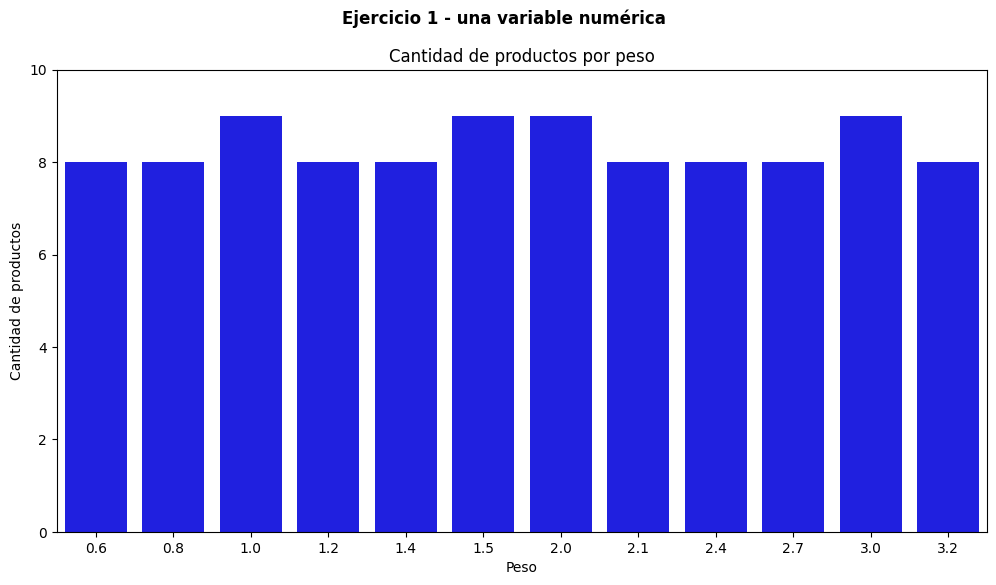

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_products,
    x='weight',  # Variable numérica en el eje X
    color='blue'
)

plt.title("Cantidad de productos por peso")
plt.xlabel("Peso")
plt.ylabel("Cantidad de productos")
plt.ylim(0,10)
plt.suptitle('Ejercicio 1 - una variable numérica ', fontweight = 'bold')

plt.show()

** Ejercicio 2 <br>

** Dos variables numéricas.<br>

Para este ejercicio seleccioné las variables numéricas price y weight del DataFrame df_products. 

** Lo que llama la atención de graficar esta variable

Graficar estas variables numericas, me permite observar la realcion que existe entre el precio del producto y su peso, con esto podria saber por ejemplo si los productos mas caros son los mas pesados o no. 

** Justificación de la elección del gráfico <br>

La grafica de linea me permite visualizar las tendencias en datos numéricos continuos. En este caso concreto, la grafica de linea me permite visualizar cómo varía el precio a medida que cambia el peso.


** Explicación del código:<br>

1. Configuro el tamaño del gráfico.
2. Genero una gráfica de líneas con sns.lineplot(), mostrando cómo cambia el precio (y) en función del peso (x).
    * data=df_products: Especifica el DataFrame que contiene los datos.
    * x='weight' y y='price': Define el peso en el eje X y el precio en el eje Y.
    * color='royalblue': La línea se muestra en azul
3. Defino las etiquetas de los ejes
4. Agrego un título y un subtitulo.
5. Muestro el gráfico con plt.show().

** Interpretación de los resultados en función de los datos<br>

Al inicio, el precio aumenta con el peso. Luego, hay una disminución notable, lo que sugiere que algunos productos más pesados pueden ser más baratos. Al final, el precio vuelve a aumentar con el peso.
La sombra azul alrededor de la línea indica la variabilidad o intervalo de confianza en los datos. En algunos puntos, la sombra es más ancha, lo que sugiere más dispersión en los precios para ciertos pesos. En otros puntos, la sombra es más estrecha, indicando menor variabilidad (precios más consistentes).

En conclusion, el precio de los productos no esta directamente relacionado con el peso. Por otra parte me sugiere algunas preguntas para posteriores analisis como: ¿Existen descuentos para ciertos pesos?. ¿Hay diferentes tipos de productos con precios variados dentro del mismo rango de peso?, cuales?. Este análisis sugiere que la empresa podría evaluar estrategias de precios y entender mejor la demanda según el peso. 

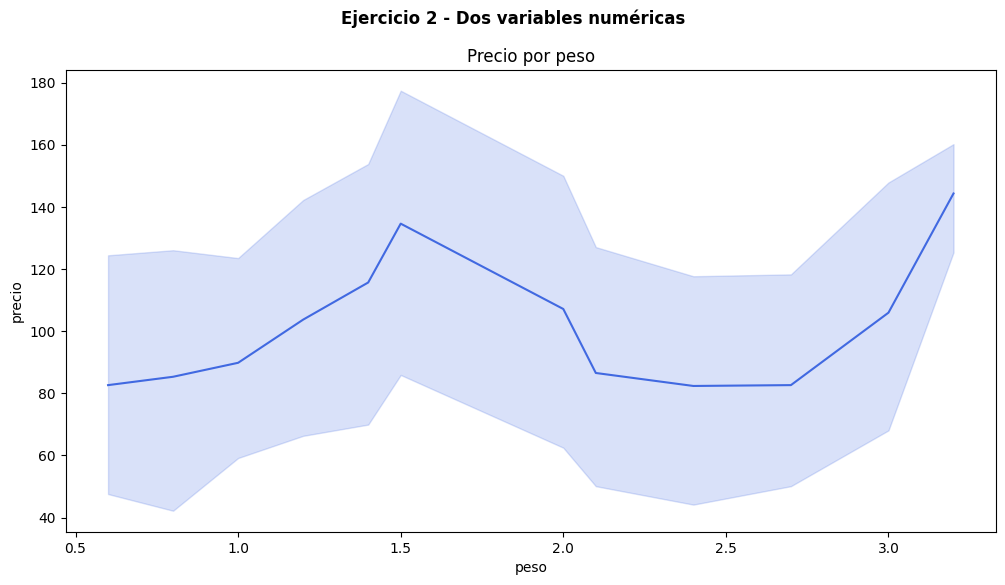

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_products,
    x='weight',
    y='price',
    color='royalblue'
)

plt.xlabel("peso")
plt.ylabel("precio")
plt.title("Precio por peso")
plt.suptitle('Ejercicio 2 - Dos variables numéricas ', fontweight = 'bold')
plt.show()


** Ejercicio 3 <br>

** Una variable categórica.<br>
   Para este ejercicio he elegido la variable categóricas country del DataFrame df_users.

** Lo que llama la atención de graficar esta variable<br>
   Observar la cantidad de usuarios que hay en cada pais. 

** Justificación de la elección del gráfico <br>
La grafica de barras con countplot es idonea para variables categóricas, ya que muestra la frecuencia de cada categoría, permite comparar rápidamente el número de usuarios en cada país y usa barras proporcionales, facilitando la visualización de las diferencias entre las categorias:
   
** Explicación del código:<br>

1. Configuro el tamaño del gráfico.
2. Genero un gráfico de barras con sns.countplot, para contar la frecuencia de usuarios en cada categoría en la variable country.
   * data=df_users: Indica el DataFrame que contiene los datos.
   * x='country': Usa el país como variable en el eje X.
   * color='blue': Establece el color azul para las barras.
3. Se rotan las etiquetas del eje X 45 grados
4. Se asignan nombres a los ejes
5. Se añade un título y subtitulo.
6. Se muestra el gráfico con plt.show().


** Interpretación de los resultados en función de los datos<br>

Estados Unidos tiene la mayor cantidad de usuarios (~150), Canadá (~75 usuarios) tiene menos de la mitad de los usuarios de EE.UU y Reino Unido (~50 usuarios) tiene la menor cantidad de usuarios registrados.

Esto puede deberse a que por una parte la plataforma podría ser más popular en EE.UU. que en los otros países. Por otra parte, puede haber estrategias de marketing enfocadas en EE.UU. Ademas, la disponibilidad del servicio o productos podría ser mayor en EE.UU.

Recomendaciones:
Si el objetivo es expandir la base de usuarios, se podrían analizar campañas dirigidas a Reino Unido y Canadá.
También sería útil entender por qué EE.UU. tiene más usuarios: ¿Más publicidad? ¿Más demanda? ¿Mayor presencia del servicio?
En conclusión, la empresa podría usar estos datos para optimizar sus estrategias de crecimiento y expansión en diferentes países. 

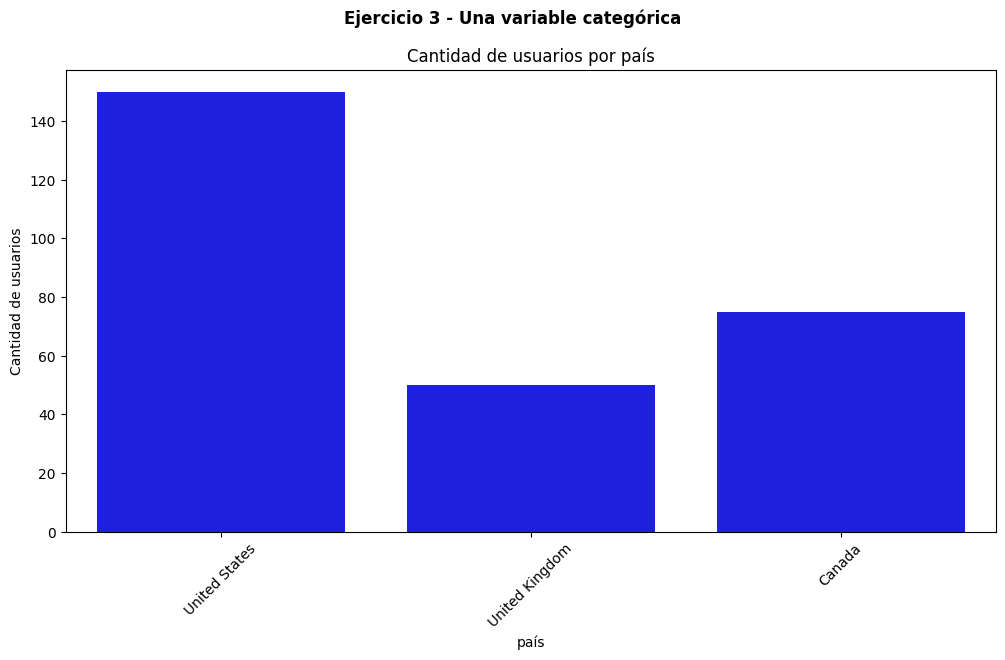

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_users,
    x='country',  
    color='blue'
)

plt.xticks(rotation=45)
plt.xlabel("país")
plt.ylabel("Cantidad de usuarios")
plt.title("Cantidad de usuarios por país")
plt.suptitle('Ejercicio 3 - Una variable categórica ', fontweight = 'bold')
plt.show()

** Ejercicio 4 <br>

** Una variable categórica y una numérica.<br>

   Para este ejercicio he elegido la variable categorica country del DataFrame df_companies.

** Lo que llama la atención de graficar esta variable<br>
   
   Observar la cantidad de empresas que hay en cada pais 

** Justificación de la elección del gráfico <br>
   He utilizado el grafico Treemap para el cual he tenido que instalar la libreria squarify. El treemap muestra la distribución de empresas en distintos países, permitiendo visualizar rápidamente qué países tienen más o menos empresas mediante el tamaño de los rectángulos. Ademas, es ideal para representar relaciones jerárquicas o distribuciones de datos categóricos con valores numéricos y permite mostrar muchos países sin sobrecargar la visualización.
   
** Explicación del código:<br>

1. Cuenta cuántas empresas hay en cada país y lo almacena en un DataFrame.
Renombra las columnas a 'country' (nombre del país) y 'count' (cantidad de empresas).
2. Crea la figura del gráfico con un tamaño adecuado.
3. Dibuja el Treemap donde el tamaño de cada rectángulo representa la cantidad de empresas por país.
   * sizes=df_country['count']: Determina el tamaño de los bloques según la cantidad de empresas.
   * label=df_country['country']: Muestra los nombres de los países dentro de cada bloque.
   * alpha=0.7: Ajusta la transparencia de los colores.
   * color=sns.color_palette("coolwarm", len(df_country)): Asigna colores de la paleta "coolwarm" para diferenciar los países.
4. Añade título,subtitulo y oculta los ejes para mejorar la visualización.
5. Muestra el gráfico.

** Interpretación de los resultados en función de los datos<br>
Los paises con mayor cantidad de empresas son Estados Unidos, Holanda y Suecia. Los paises con menor cantidad de empresas son: China y España, seguidos de Francia y Canada. En genral se observa una desigualdad en la distribución de empresas por país. Algunos países dominan el mercado, mientras que otros tienen una presencia menor.
Esto puede deberse a factores económicos, demográficos o regulatorios en cada país.

Recomendaciones:

* Estrategia de expansión: Si una empresa busca expandirse, podría enfocarse en los países con menos empresas para aprovechar oportunidades de crecimiento.
* Análisis de mercado: Los países con más empresas pueden representar mercados saturados o altamente competitivos.
* Políticas gubernamentales: Se podría investigar si hay incentivos o barreras que afectan la cantidad de empresas en cada país.

En conclusion, este análisis permite comprender la concentración empresarial a nivel global y tomar decisiones estratégicas basadas en datos. 


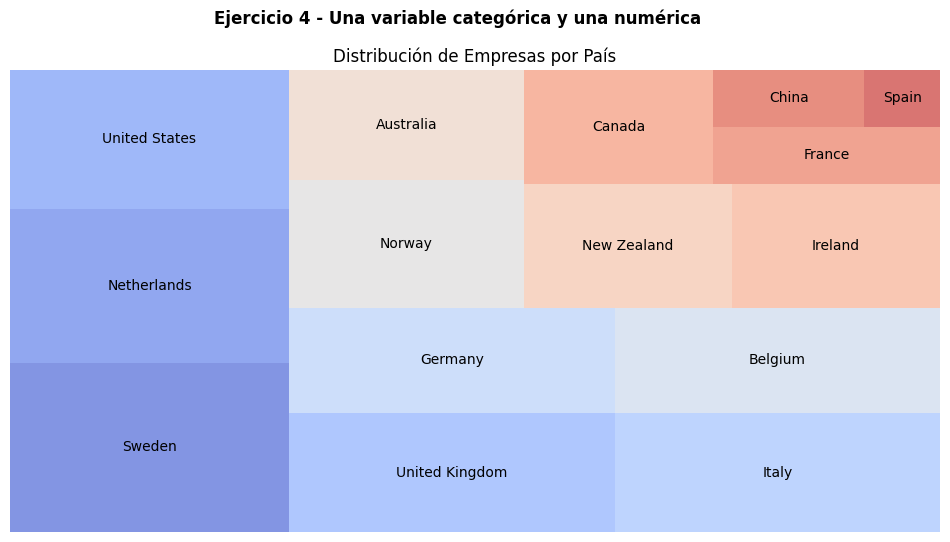

In [77]:
df_country = df_companies['country'].value_counts().reset_index()
df_country.columns = ['country', 'count']

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=df_country['count'], 
    label=df_country['country'], 
    alpha=0.7, 
    color=sns.color_palette("coolwarm", len(df_country))
)
plt.title("Distribución de Empresas por País")
plt.suptitle('Ejercicio 4 - Una variable categórica y una numérica ', fontweight = 'bold')

plt.axis("off")  
plt.show()

** Ejercicio 5 <br>

** Dos variables categóricas.
   
   Para este ejercicio he elegido la variables categoricas nombre de la empresa del DataFrame df_companies y año del DataFrame df_transaction.

** Lo que me llama la atención de graficar estas variables es:_<br>
   
   Conocer el nombre de las 5 empresas que mas transacciones han realizado en el año 2021 y 2022.

** Justificación de la elección del gráfico <br>
   El mapa de calor permite visualizar la distribución de transacciones por empresa y año de manera clara. Tambien, resalta las diferencias en cantidad mediante una escala de colores, facilitando la comparación. Ademas, permite detectar patrones de actividad, es decir, si una empresa tuvo más transacciones en un año específico.
   
** Explicación del código:<br>

1. Selecciono las 5 empresas con más transacciones del DataFrame df_transactions_companies
   * value_counts().head(5).index obtiene las 5 empresas con más transacciones.
   * Se filtran las transacciones para incluir solo las de estas 5 empresas.
2. Creo la tabla de frecuencia cruzada. pd.crosstab() cuenta el número de transacciones por empresa y año, generando una tabla de frecuencia.
3. Genero el mapa de calor  
   * Se define el tamaño de la figura.
   * sns.heatmap() genera un mapa de calor donde:
   * tabla_frecuencia es la matriz de datos.
   * annot=True muestra los valores en cada celda.
   * cmap="Blues" usa una escala de colores en tonos azules.
   * fmt="d" muestra los valores como enteros. 
4. Agrego títulos y muestro la gráfica.

** Interpretación de los resultados en función de los datos<br>

Empresas con más transacciones

La empresa "Nunc Interdum Incorporated" tiene la mayor cantidad de transacciones en 2021 (86).
Las demás empresas tienen valores más bajos y relativamente similares (de 43 a 54)

Distribución de transacciones por año

En general, hay más transacciones en 2021 que en 2022.
Todas las empresas muestran una disminución de transacciones en 2022, debido a que en el año 2022 solo tenemos datos de los 3 primeros meses del año.

Diferencias entre empresas

Algunas empresas como "Ut Semper Foundation" tienen una cantidad mucho menor de transacciones en 2022 comparado con 2021.
Otras como "Lorem Eu Incorporated" también muestran una caída, pero menos drástica.

En conclusion, se observa una disminución general del numero de transacciones en 2022 en relacion al 2021. La empresa "Nunc Interdum Incorporated" fue la más activa en 2021, pero también tuvo una disminución en 2022. Este análisis podría ayudar a investigar las razones detrás de la caída en transacciones y tomar decisiones estratégicas.

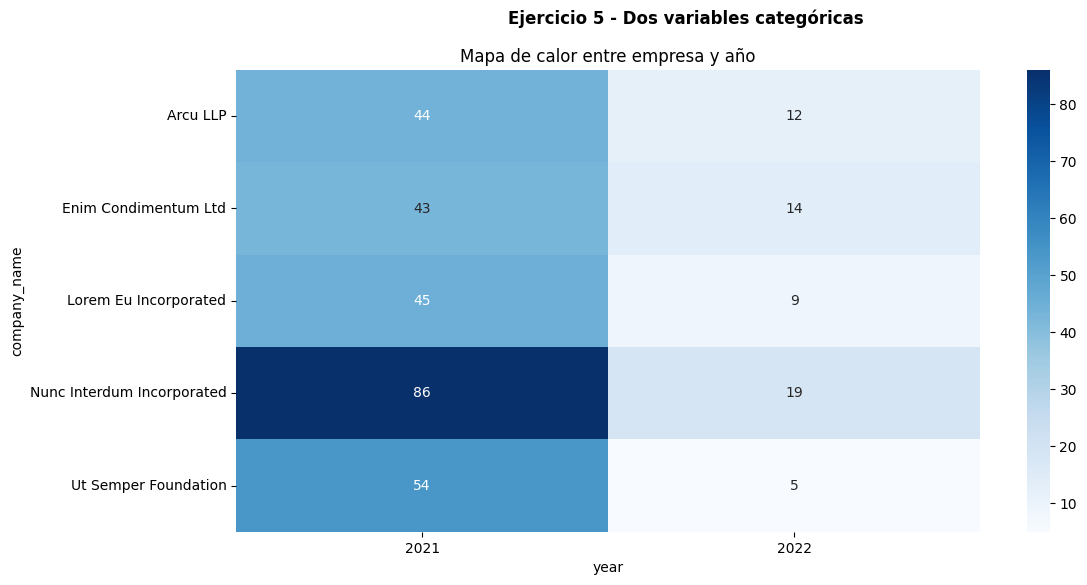

In [78]:
top_5_empresas = df_transactions_companies['company_name'].value_counts().head(5).index
df_empresa_top5 = df_transactions_companies[df_transactions_companies['company_name'].isin(top_5_empresas)]

tabla_frecuencia = pd.crosstab(df_empresa_top5['company_name'], df_empresa_top5['year'])

plt.figure(figsize=(12,6))
sns.heatmap(
    tabla_frecuencia,
    annot=True,
    cmap="Blues",
    fmt="d"
)

plt.title("Mapa de calor entre empresa y año")
plt.suptitle('Ejercicio 5 - Dos variables categóricas', fontweight='bold')
plt.show()

** Ejercicio 6 <br>

** Tres variables.<br>

   Para este ejercicio he elegido 2 variables categoricas el pais de la empresa del DataFrame df_companies, el año del DataFrame df_transactions y una variable numerica la media del amount del DataFrame df_transactions

** Lo que llama la atención de graficar esta variable<br>
   
   Observar la media de las ventas por pais y por año 2021 o 2022  

** Justificación de la elección del gráfico <br>
   
   He utilizado un gráfico de barras agrupadas porque permite comparar la media de ventas entre países y entre años dentro del mismo gráfico. Por una parte, es fácil de interpretar al mostrar claramente las diferencias entre cada año y por otra parte visualiza tendencias y cambios a lo largo del tiempo dentro de cada país.

   Un gráfico de líneas también podría haber funcionado, pero el gráfico de barras es más intuitivo para comparar valores en diferentes categorías.

** Explicación del código:<br>

1. A partir del DataFrame df_transactions_companies, agrupo los datos por país y año, calculo la media de las ventas (amount) en cada grupo y resetea el índice para mantener un DataFrame ordenado.
2. Configuro el tamaño del gráfico.
3. Uso sns.barplot() para generar el gráfico de barras agrupadas con:
   * x='country': Países en el eje X.
   * y='amount': Media de ventas en el eje Y.
   * hue='year': Diferencia los años con colores.
   * palette="coolwarm" → Aplica una paleta de colores para diferenciar los años.
4. Añado etiquetas a los ejes, título y subtitulo.
5. Roto las etiquetas del eje X 
6. Muestro el gráfico.

** Interpretación de los resultados en función de los datos<br>
En la mayoría de los países, las ventas fueron más altas en 2021 que en 2022. Algunos países, como Nueva Zelanda, Italia e Irlanda, experimentaron un crecimiento en 2022.
En países como España, China y Belgica, las ventas cayeron significativamente en 2022.

La caída de ventas en varios países podría estar relacionada con factores económicos, cambios en la demanda o nuevas regulaciones. Los países con un crecimiento en 2022 pueden haber implementado estrategias exitosas para aumentar las ventas.

Recomendaciones:
* Análisis de factores externos: Investigar por qué algunos países crecieron y otros no.
* Estrategia de recuperación: Implementar acciones para aumentar las ventas en los países con caída.
* Expansión en mercados en crecimiento: Aprovechar oportunidades en países con tendencia positiva.

En conclusion, este análisis permite tomar decisiones estratégicas basadas en datos para mejorar el rendimiento de ventas en el futuro.

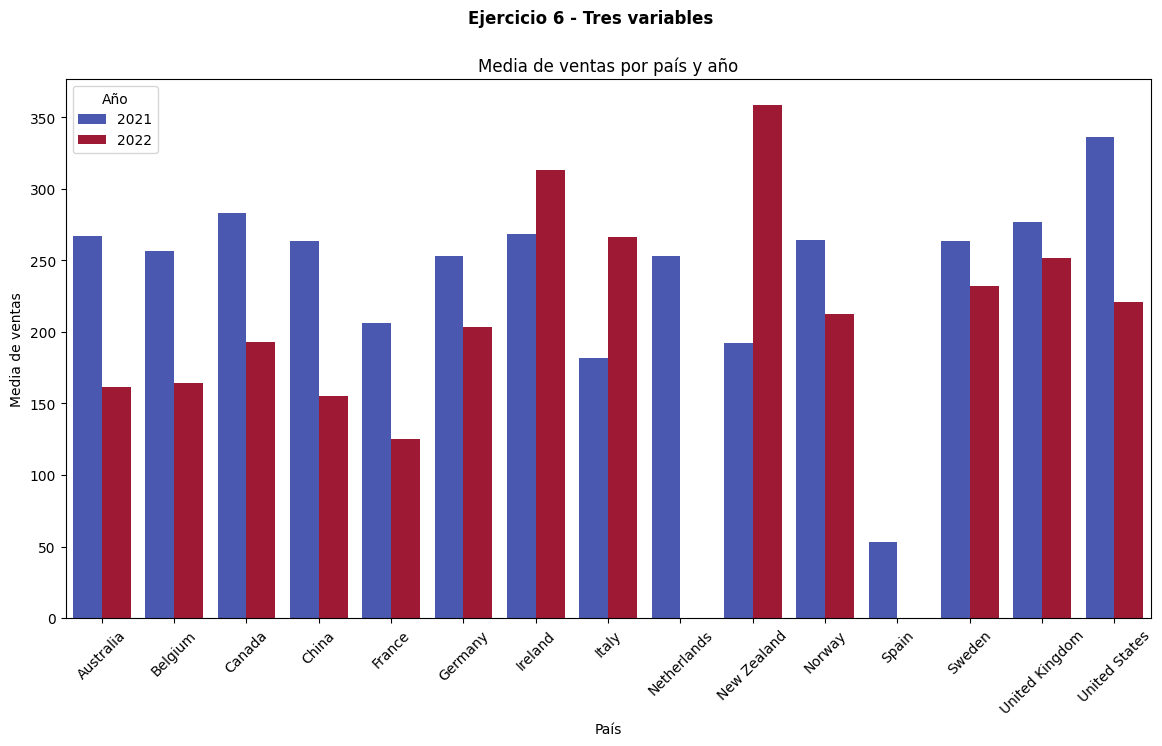

In [79]:
df_grouped = df_transactions_companies.groupby(['country', 'year'])['amount'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_grouped,
    x='country',
    y='amount',
    hue='year',
    palette="coolwarm"
)

plt.xlabel('País')
plt.ylabel('Media de ventas')
plt.legend(title='Año')
plt.xticks(rotation=45)  
plt.title('Media de ventas por país y año')
plt.suptitle('Ejercicio 6 - Tres variables', fontweight = 'bold')
plt.show()

** Ejercicio 7 <br>

** Graficar un Pairplot.

   Para este ejercicio he elegido las variables uméricas price del producto del DataFrame df_products y el id del DataFrame df_transactions_products.

** Lo que llama la atención de graficar esta variable<br>
   
   Conocer la relacion que esxiste entre el precio de los productos y las veces en que han sido vendidos. 

** Justificación de la elección del gráfico <br>
   
El Pairplot es ideal para analizar relaciones entre variables numéricas (en este caso, precio y cantidad vendida). Ademas, permite visualizar patrones, correlaciones y distribuciones de datos en una sola figura. Tambien facilita la identificación de tendencias, por ejemplo, si los productos más baratos se venden más o si hay una dispersión de precios.

** Explicación del código:<br>

1. A partir del DataFrame df_product_transactions_products, agrupo los datos por id y price para contar cuántas veces ha sido vendido cada producto. El .size() cuenta las ocurrencias y .reset_index(name='veces_vendido') renombra la columna con este conteo.
2. Configuro el tamaño del gráfico
3. Creo un Pairplot usando sns.pairplot() con los siguientes parametros: 
   * vars=['price', 'veces_vendido'] : usa solo las variables de interés.
   * diag_kind='kde': muestra una distribución suavizada en los histogramas de la diagonal.
   * height=3, aspect=2 : ajusta el tamaño de las subgráficas.
4. Añado un título principal 
5. Personalizo las etiquetas de los ejes y el tamaño de la fuente 
6. Ajusto los márgenes para evitar superposiciones.
7. Muestro el gráfico.

** Interpretación de los resultados en función de los datos<br>

En la grafica PairPlot se observa que:
* la distribución del precio de los productos es bimodal, con dos picos principales alrededor de valores cercanos a 100 y 200.
* en relacion a la distribucion de la cantidad vendida, la mayoría de los productos tienen valores bajos, pero hay un grupo que alcanza más de 60 ventas.
* se pueden identificar con facilidad dos grupos de productos muy marcados:

   * Productos vendidos: que superan la cantidad de 40 veces vendido. No exixte una relación clara entre precio y cantidad de ventas, ya que tanto productos de bajo precio como productos de alto precio han sido vendidos varias veces, algunos acercandose a 60 y 85 veces vendido aproximadamente. Esto sugiere que otros factores, como la marca, la calidad o el marketing, podrían ser más determinantes que el precio.

   * Productos no vendidos: Son la gran mayoría y se concentran en cero ventas. Esto podría deberse a la falta de stock y/o de demanda, precios poco atractivos o poca visibilidad.

Dado que la mayoría de los productos no se vendieron ni una sola vez, sería interesante analizar qué los hace diferentes de los que sí se vendieron. Además, si el precio no es un factor decisivo en las ventas, quizá valga más la pena enfocarse en mejorar estrategias de promoción y posicionamiento en lugar de solo ajustar precios.

En conclusión, este análisis nos ayuda a entender la relación entre el precio y la demanda y sugiere que el precio no es el único factor que influye en la cantidad de productos vendidos.

<Figure size 1400x700 with 0 Axes>

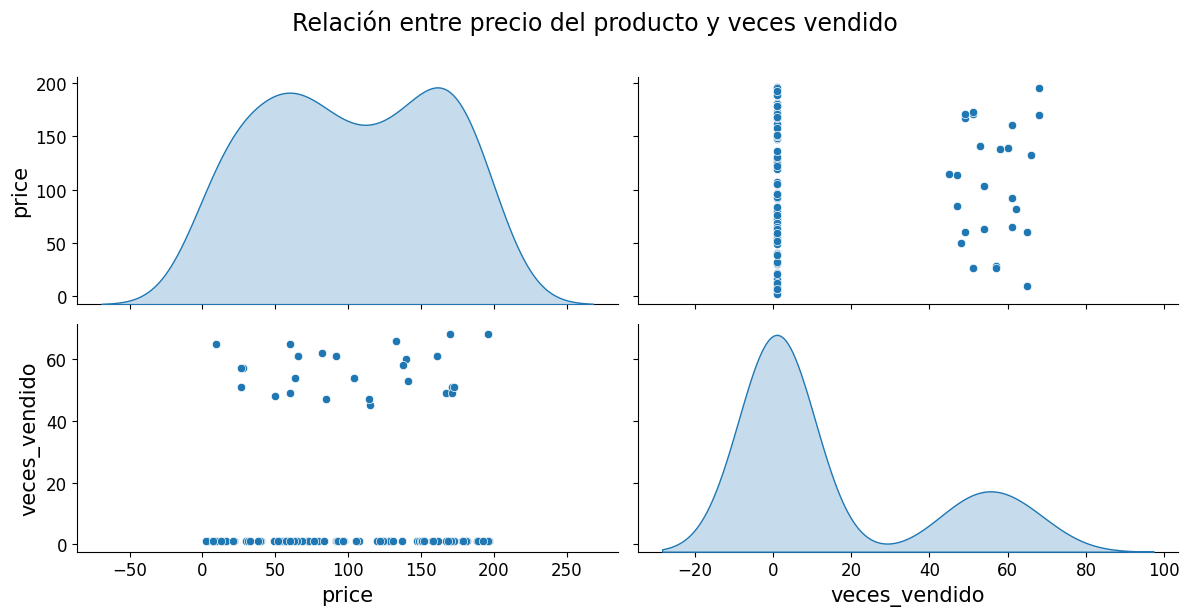

In [80]:
df_product_count = df_product_transactions_products.groupby(['id', 'price']).size().reset_index(name='veces_vendido')

plt.figure(figsize=(14, 7), layout="constrained")

ax = sns.pairplot(df_product_count, vars=['price', 'veces_vendido'], diag_kind='kde', height=3, aspect=2)

plt.suptitle('Relación entre precio del producto y veces vendido', size=17, y=1.02)

for x in ax.axes.flatten():
    x.set_xlabel(x.get_xlabel(), fontsize=15)
    x.set_ylabel(x.get_ylabel(), fontsize=15)
    x.tick_params(axis='both', labelsize=12)
plt.tight_layout()

plt.show()

## Nivel 2
***


** Ejercicio 1 <br>

** Correlación de todas las variables numéricas.

Para este ejercicio he seleccionado las variables uméricas price y weight del producto del DataFrame df_products y amount y declined del DataFrame df_transactions.


** Lo que me llama la atención de graficar estas variables es: <br>
Observar las relaciones entre las variables numéricas precio, peso, monto y declined en un solo gráfico.

** Justificación de la elección del gráfico <br>
La grafica matriz de correlacion muestra qué tan fuerte es la relación entre dos variables con valores entre -1 y 1:

* Cercano a 1: fuerte correlación positiva (cuando una variable sube, la otra también).
* Cercano a -1: fuerte correlación negativa (cuando una sube, la otra baja).
* Cercano a 0: no hay relación clara entre las variables.

Ademas, es ideal para identificar patrones en datos.

** Explicación del código:<br>


1. Selecciono las columnas price, weight, amount y declined para el análisis de correlación.
2. Uso pd.to_numeric() con errors='coerce' para asegurar que las columnas sean numéricas y manejar posibles errores en los datos, del DataFrame df_transactions_tran_prod_products.
3. Cálculo de la matriz de correlación usando .corr()
4. Creo un mapa de calor (heatmap) para visualizar la matriz de correlación.


** Interpretación de los resultados en función de los datos<br>

Correlación entre price y weight (0.19): es baja y positiva. Esto indica que, en general, los productos más pesados tienden a ser un poco más caros, pero la relación no es fuerte.

Correlación entre price y amount (0.01): es casi nula, lo que sugiere que el precio del producto no influye significativamente en el monto total de la transacción.

Correlación entre weight y amount (-0.01): no hay relación entre el peso del producto y el monto total de la compra.

Correlación entre amount y declined (-0.03): no parece haber una relación clara entre el monto de la compra y si la transacción fue rechazada.

En conclusión, las variables analizadas en este ejercicio no tienen correlaciones significativas entre sí. A posteriori, se podría hacer un análisis más profundo considerando otras variables como la la cantidad de unidades vendidas y/o la categoría del producto.


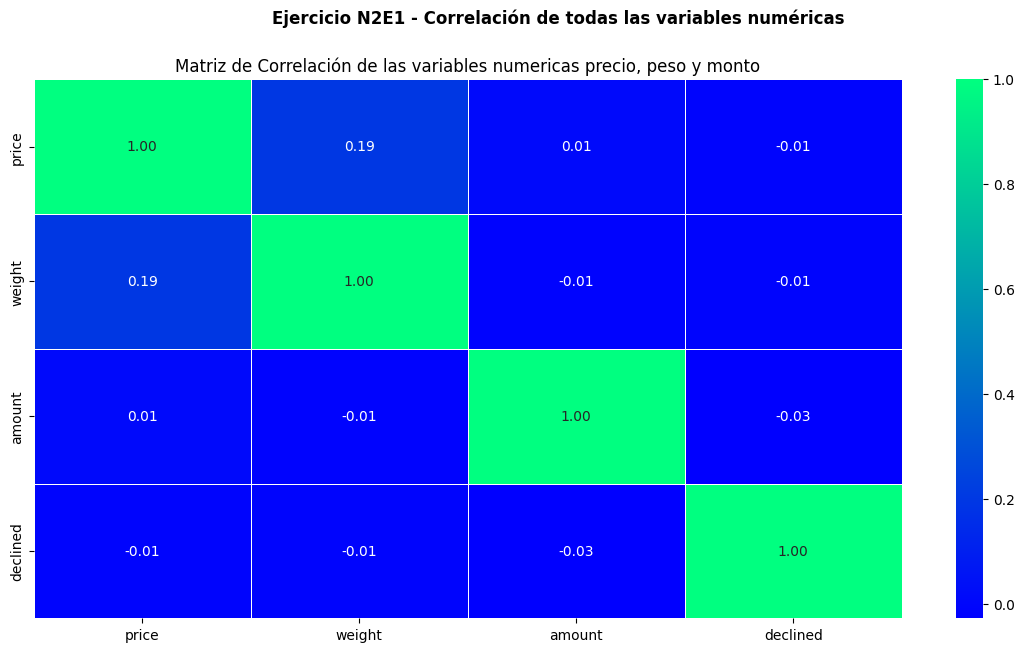

In [81]:
columnas_v_numericas = ['price', 'weight', 'amount','declined']
df_v_numericas = df_transactions_tran_prod_products[columnas_v_numericas].copy()

df_v_numericas = df_v_numericas.apply(pd.to_numeric, errors='coerce')

matriz_correlacion = df_v_numericas.corr()

plt.figure(figsize=(14,7))
sns.heatmap(matriz_correlacion, annot=True, cmap="winter", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación de las variables numericas precio, peso y monto")
plt.suptitle('Ejercicio N2E1 - Correlación de todas las variables numéricas', fontweight = 'bold')
plt.show()


** Ejercicio 2 <br>

** Implementa un jointplot.

Para este ejercicio he seleccionado las variables numéricas price del DataFrame df_products, product_id del DataFrame df_transactions_products y año del DataFrame df_transactions.

** Lo que me llama la atención de graficar estas variables es: <br>

Comparar cómo cambia la relación entre precio y cantidad de productos vendidos a lo largo del tiempo.

** Justificación de la elección del gráfico <br>

La grafica jointplot con KDE (Kernel Density Estimation) permite visualizar la relación entre dos variables (cantidad_productos y price) junto con sus distribuciones marginales.
Se usa kind='kde' para mostrar densidades de puntos en lugar de dispersión, permitiendo ver dónde se concentran más los valores. 
El jointplot permite detectar tendencias, comparar categorías (hue) y analizar la dispersión de los datos.

** Explicación del código:<br>

1. Agrupo los datos por product_id, price y year, del DataFrame df_transactions_tran_prod_products, contando cuántas veces ha sido vendido cada producto.
2. Asegura que las etiquetas del eje X se muestren correctamente.
3. Creo el jointplot con KDE
4. Agrega título y muestra el gráfico.

** Interpretación de los resultados en función de los datos <br>

Diferencias entre 2021 y 2022

* En 2021, los productos más vendidos están en un rango de precios más alto (aproximadamente 100 a 200), pero con una mayor cantidad de productos vendidos por transacción (aproximadamente 30-60).
* En 2022, los productos vendidos tienen precios similares, pero con una cantidad menor de productos por transacción (aproximadamente 5-20).

Distribución de precios y ventas

* En 2021, hay una concentración de productos con precios más altos y mayor cantidad vendida.
* En 2022, los productos vendidos tienen precios similares, pero la cantidad comprada por transacción es menor.

En conclusión, la cantidad de productos vendidos por transacción disminuyó en 2022 en comparación con 2021. Los precios se mantuvieron similares, pero los patrones de compra cambiaron. Esto se debe a que en el año 2022 solo tenemos informacion de los 3 primeros del año y es posible que si tueviesemos los datos faltantes, el patron de compra seria diferente. 

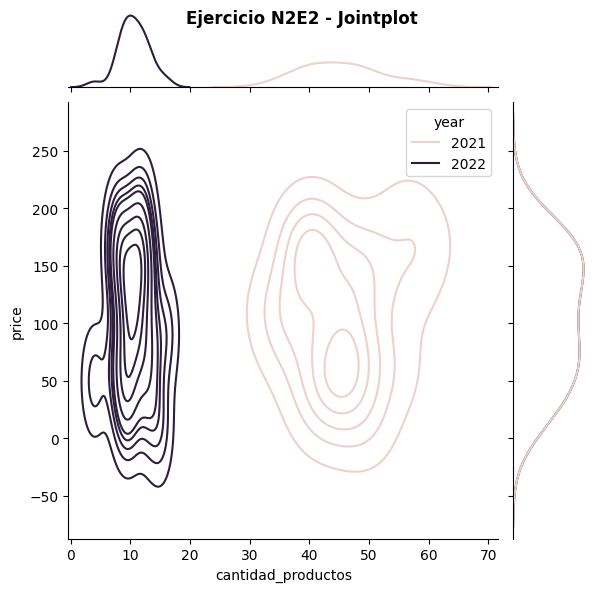

In [82]:
df_transactions_tran_prod_products = df_transactions_tran_prod_products.groupby(['product_id', 'price', 'year']).size().reset_index(name='cantidad_productos') 


g = sns.jointplot(data=df_transactions_tran_prod_products, x='cantidad_productos', y='price', hue='year', kind='kde')

g.figure.suptitle('Precio y veces q ha sido vendido', y=1.02)
plt.suptitle('Ejercicio N2E2 - Jointplot', fontweight = 'bold')

plt.show()


## Nivel 3
***
** Ejercicio 1 <br>

** Implementa un violinplot combinado con otro tipo de gráfico.


** Lo que me llama la atención de graficar estas variables es <br>
Observar la distribución de la variable amount (ventas) en función del year (año), en el violinplot y tambien observar la tendencia de la media de las ventas en cada año, en el pointplot.

** Justificación de la elección del gráfico <br>
El Violinplot + Pointplot me permite ver la forma de la distribución de las ventas y también cómo evoluciona la media a lo largo del tiempo. 

** Explicación del código: <br>

Este código combina un gráfico de violín (violinplot) con un gráfico de puntos (pointplot) para visualizar tanto la distribución de las ventas por año como su tendencia promedio.
1. Creo la figura y configuro su tamaño
2. Gráfico de violín (Violinplot) a partir del DataFrame df_transactions_companies. En el violinplot inner='quartile' agrega líneas internas para la mediana y cuartiles.
3. Gráfico de puntos (Pointplot) a partir del DataFrame df_transactions_companies.. En el pointplot las barrras de error muestra la desviación estándar en cada punto
4. Agrego títulos y etiquetas
5. Muestro la grafica


** Interpretación de los resultados en función de los datos <br>

Distribución de Ventas

* En 2021, la distribución de ventas es más amplia y muestra más variabilidad.
* En 2022, la distribución parece más concentrada hacia valores más bajos.

Tendencia de la Media

* La línea roja muestra que el promedio de ventas en 2022 es menor que en 2021.
* Indica una posible disminución en ventas de un año a otro.

En conclusión, el gráfico sugiere que en 2022 hubo menores ventas en promedio, y la dispersión también cambió. Esto se debe a que en el año 2022 solo tenemos informacion de los 3 primeros meses del año y es posible que si tueviesemos los datos faltantes, la distribucion de las ventas y la tendencia de la media serian diferentes. 

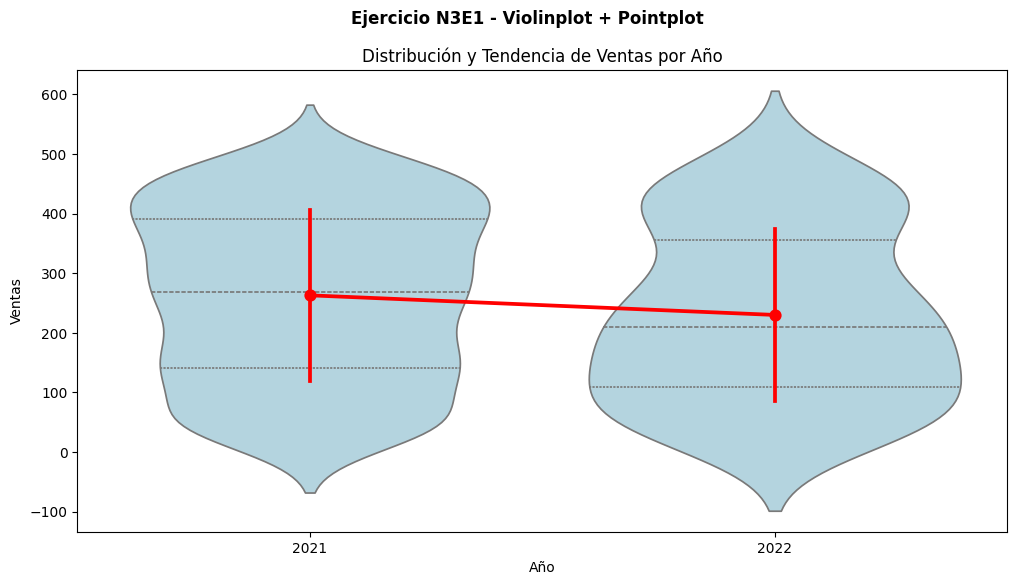

In [83]:
plt.figure(figsize=(12, 6))

sns.violinplot(data=df_transactions_companies, x='year', y='amount', color='lightblue', inner='quartile')
sns.pointplot(data=df_transactions_companies, x='year', y='amount', color='red', markers='o', errorbar="sd")

plt.title('Distribución y Tendencia de Ventas por Año')
plt.suptitle('Ejercicio N3E1 - Violinplot + Pointplot', fontweight = 'bold')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.show()

** Ejercicio 2 <br>

** Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.


** Lo que me llama la atención de graficar las variables amount y country en un FacetGrid es: <br>

observar cómo se distribuyen las ventas (amount) en los diferentes países.

** Justificación de la elección del gráfico <br>

El FacetGrid permite visualizar múltiples distribuciones simultáneamente en subgráficos separados. El histograma permite observar cómo se distribuyen las ventas (amount) en diferentes países. Con un FacetGrid se pueden analizar patrones de variabilidad país a país.

** Explicación del código:<br>

1. Agrupo la suma de ventas (amount) por país a partir del DataFrame df_transactions_companies. 
2. Creo un FacetGrid para crear múltiples subgráficos, uno por cada país.
   * col="country": Crea una columna para cada país.
   * col_wrap=4: Organiza los gráficos en filas de 4 columnas.
3. Grafico histogramas para representar la distribución de ventas (amount) en cada país
4. Agrego títulos y etiquetas

** Interpretación de los resultados en función de los datos: <br>

En la grafica se observan distribuciones variadas, es decir, algunos países tienen distribuciones uniformes, como Suecia, mientras que otros presentan sesgo hacia valores bajos o altos, como Reino Unido.

Entre los paises con más transacciones se encuentran: Alemania, Canadá y Reino Unido. Estos países presentan una cantidad significativa de transacciones en varios rangos de "amount".
Entre los países con menos transacciones se encuentran: España, China y Francia.
Sesgo en la distribución: Algunos países tienen una mayor concentración de transacciones en valores bajos, mientras que otros presentan valores dispersos.

En conclusión, los países con más transacciones pueden estar teniendo un mayor volumen de ventas o un mercado más activo. La presencia de transacciones de alto monto en algunos países sugiere la existencia de grandes compras o clientes corporativos.

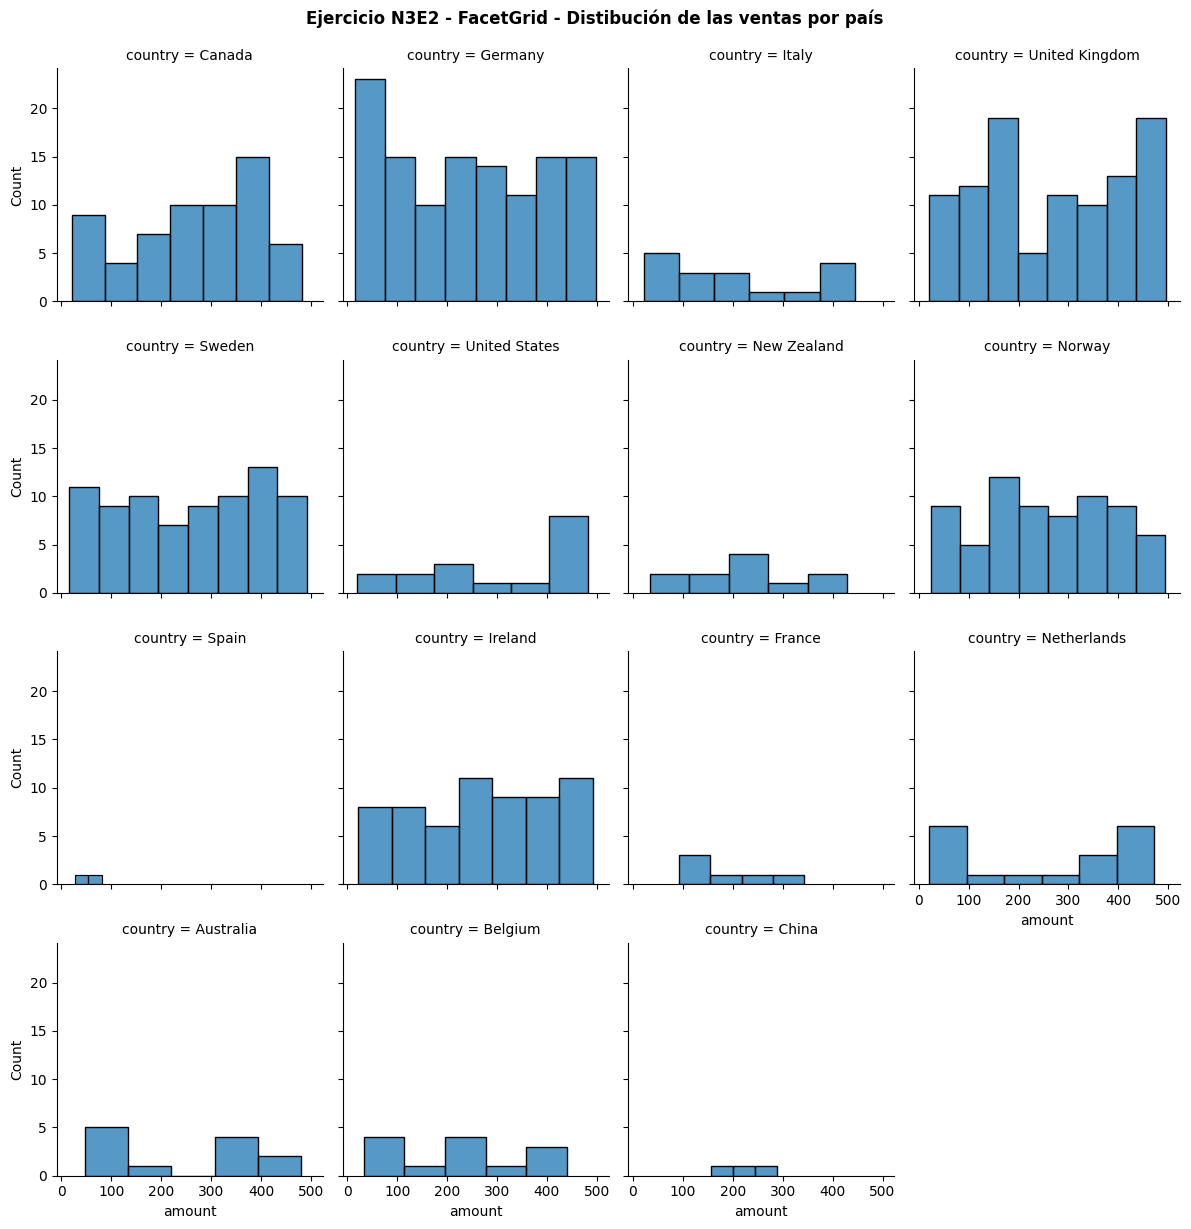

In [84]:
amount_pais = df_transactions_companies.groupby('country')['amount'].sum().reset_index() 

g = sns.FacetGrid(df_transactions_companies, col="country", col_wrap=4)

g.map(sns.histplot, "amount")

plt.suptitle('Ejercicio N3E2 - FacetGrid - Distibución de las ventas por país', fontweight = 'bold', y=1.02)
plt.show()
